# Logistic Regression
In this notebook we will solve a classification problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

The objective of this task is to build a model that predicts whether an individual has Diabetes or not based several medical predictors contained in the **dataset/pima.csv** file. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The explanation of the predictor variables is as follows:
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:** Diabetes pedigree function
- **Age:** Age (years)
- **Outcome:** Class variable (0 or 1)




Our workflow for this task will involve the following:
1. Importing Libraries for our task
2. Reading the data from the provided file
3. Exploring the data 
4. Preprocessing the data and Splitting the data into training and test sets
5. Building the model to fit the training data
6. Using the model to make predictions for the test data set 
7. Evaluating our model performance

### Step 1: Importing Libraries for our task
We shall start the process by importing the necessary libraries which are:
- **Pandas:** a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- **Numpy:**  a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate n these arrays.
- **Matplotlib:** a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Scikit-learn:** an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem.


In [676]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [677]:
df = pd.read_csv('dataset/01-pima-diabetes.csv')

### 3. Exploring the data 
Let us explore the data by examining it's shape, summary on its continuous variables.

We shall start by using the **shape** attribute of our data which outputs just a tuple of (rows,
columns)

In [678]:
df.shape

(768, 9)

We are starting to get more comfortable with our dataset, let us look at the distribution of our classes (those with diabetes and those without diabetes)

In [679]:
people_with_diabetes = df["Outcome"].value_counts()[1]
people_without_diabetes = df["Outcome"].value_counts()[0]
print("No. of people without diabetes: ", people_without_diabetes)
print("No. of people with diabetes : ", people_with_diabetes)
print("Percent of people with diabetes : ",round(people_with_diabetes/(people_with_diabetes+people_without_diabetes)*100,2), "%")

No. of people without diabetes:  500
No. of people with diabetes :  268
Percent of people with diabetes :  34.9 %


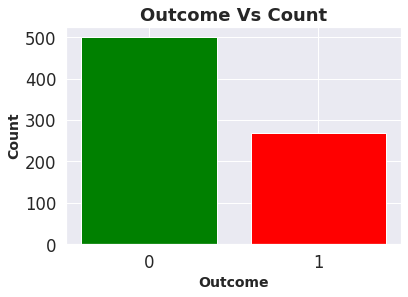

In [680]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Count',fontsize=14,fontweight='bold')
ax.set_xlabel('Outcome',fontsize=14,fontweight='bold')
ax.set_title('Outcome Vs Count',fontsize=18, fontweight='bold')
outcomes = ['0', '1']
count = [people_without_diabetes,people_with_diabetes]
ax.bar(outcomes,count,color=["green","red"])
plt.show()

We can see that the ratio of Outcomes  0:1 is 65% : 35% (which is not bad and acceptable). 
Though we can use **Stratified sampling** during our train-test-split exercise to handle the class imbalance.

### 4. Preprocessing the data and Splitting the data into training and test sets
Let us check '0s' in some of the features and impute them. We will exclude "Pregnancies" column from this imputation since '0' pregnancies is a valid information. i.e. 0 value for Blood pressure, BMI, Insulin etc. indicate that there is problem in the data that needs to be addressed.

In [681]:
feature_columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

We are going to replace the '0s' with null (NaN), this will make it easy to fill the missing values

In [682]:
df[feature_columns[1:]] = df[feature_columns[1:]].replace(to_replace=0, value=np.nan)

In [683]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [684]:
print("Number of missing values in dataframe : \n", df.isnull().sum())
print("-------------------------")
print("Percentage of columnwise missing values in dataframe : \n", round(df.isnull().mean() * 100, 2))

Number of missing values in dataframe : 
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
-------------------------
Percentage of columnwise missing values in dataframe : 
 Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64


#### 4.1 Data Imputation

In order to fill the missing values in our dataset we are going to use a technique called imputation.

Imputation in statistics refers to the procedure of using alternative values in place of missing data.

Missing information can introduce a significant degree of bias, make processing and analyzing the data more difficult, and reduce efficiency, which are the three main issues it causes.

We are going to use the SimpleImputer module from Sklearn (Read more on the link below)

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [685]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_cols = df.columns
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = df_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


We are going to split our data into training and test sets using the **train_test_split()** function we've imported from the Scikit-Learn library. We will start by slicing our data to obtain features input ($X$) and label ($y$). In other words features are the independent variables while labels are dependent variables whose values are to be predicted. 

In [686]:
X = df[feature_columns]
y = df.Outcome

Our dataset has features of with varying ranges, thus we need to perform feature scaling before we train our model

In [687]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = feature_columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=df["Outcome"], random_state=24)

### 5. Building the model to fit the training data
We are going to fit our model to the training data by using the LogisticRegression() module we've imported from the Scikit-learn

In [689]:
model = LogisticRegression(random_state=16)
model.fit(X_train,y_train)

LogisticRegression(random_state=16)

### 6. Using the model to make predictions for the test data set 
After fitting the model we can use it to make some predictions on the test data, this will be usefull during the evaluation phase of our model. 

In [690]:
# fit the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [691]:
# import the metrics class
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[126,  24],
       [ 32,  49]])

<module 'seaborn' from '/home/mark/Workspace/Python/jupyter/ENV/lib/python3.8/site-packages/seaborn/__init__.py'>

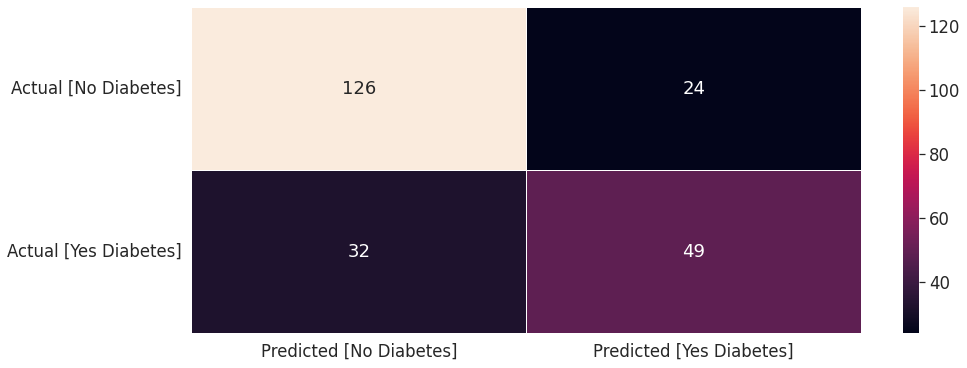

In [692]:
import seaborn as sns
ylabel = ["Actual [No Diabetes]","Actual [Yes Diabetes]"]
xlabel = ["Predicted [No Diabetes]","Predicted [Yes Diabetes]"]
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1, fmt='g')
sns

In [693]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
296,-0.547919,0.800295,-0.197433,1.012114,2.540672,-0.648436,-0.407342,-0.360847
68,-0.844885,-0.876318,-0.528319,-1.833485,-1.189339,-1.871019,-0.416403,-0.701198
504,-0.250952,-0.843443,0.464339,1.125938,-0.181541,0.705138,-0.706334,0.575118
272,-0.250952,0.011301,0.464339,-0.012301,-0.181541,-1.376164,-0.658012,0.575118
707,-0.547919,0.175675,-2.182747,-0.922893,2.251075,0.283056,-0.893582,-0.956462
...,...,...,...,...,...,...,...,...
149,-0.547919,-1.040692,-0.197433,-1.378189,-0.181541,-0.750318,-1.168412,-0.956462
540,1.233880,-0.711944,0.133453,1.239762,0.861009,1.010784,0.571176,0.830381
368,-0.250952,-1.336565,1.126110,-1.492013,-0.864991,-0.721209,-0.500966,-0.956462
545,1.233880,2.115286,1.456996,0.670643,0.976848,0.297610,-0.147612,0.319855


We can try to make predictions for a new observation, observe how we created the dataframe and used the scaler we previously created for our dataset

In [694]:
data = {
'Pregnancies':[1],
'Glucose': [109],
'BloodPressure':[60],
'SkinThickness':[8],
'Insulin':[182],
'BMI':[25.4],
'DiabetesPedigreeFunction':[0.947],
'Age':[21]
}
data = pd.DataFrame(data)
data = scaler.transform(data)
data = pd.DataFrame(data, columns = feature_columns)
model.predict(data)

array([0.])